In [6]:
from google.colab import drive
drive.mount("/content/drive/")
import pickle
#Load pkl file
data=pickle.load(open("/content/drive/Shared drives/MyDrive/Kaggle/Feature Generation (Enhanced)/Real size+grey+50 feature.pkl",'rb'))
data.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,clip_count,size,grey_pixel_number,50
id,,,,
30001,11.0,11573.0,2358.0,63250.0
30002,2.0,3347.0,585.0,64964.0
30003,26.0,26315.0,5572.0,60120.0
30004,41.0,41759.0,9272.0,56514.0
30005,49.0,47345.0,10842.0,54996.0


In [0]:
data[:-5000].to_csv("/content/drive/Shared drives/MyDrive/Kaggle/Feature Generation (Enhanced)/Features.csv")

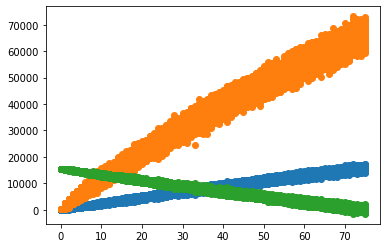

In [0]:
import matplotlib.pyplot as plt
display(plt.scatter(data.clip_count,data.grey_pixel_number))
display(plt.scatter(data.clip_count,data['size']))
display(plt.scatter(data.clip_count,data['50']))

###Linear Model

In [0]:
#Using a linear model  (Statistically, validation MSE decreased by 0.02)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_squared_error
from tqdm import tqdm

def three():
    X_train, X_test, y_train, y_test = train_test_split(data[["size","grey_pixel_number","50"]],data[["clip_count"]],test_size=0.2)

    linear_model=LinearRegression()
    linear_model=linear_model.fit(X_train,y_train)
    pred=linear_model.predict(X_test)
    #print(mean_squared_error(pred,y_test))
    return mean_squared_error(pred,y_test)
def two():
    X_train, X_test, y_train, y_test = train_test_split(data[["size","grey_pixel_number"]],data[["clip_count"]],test_size=0.2)

    linear_model=LinearRegression()
    linear_model=linear_model.fit(X_train,y_train)
    pred=linear_model.predict(X_test)
    #print(mean_squared_error(pred,y_test))
    return mean_squared_error(pred,y_test)

result_three=[]
result_two=[]
for i in tqdm(range(100)):
    result_three.append(three())
    result_two.append(two())

In [0]:
from scipy.stats import ttest_ind
ttest_ind(result_three,result_two)

Ttest_indResult(statistic=-2.994185948711937, pvalue=0.003102684686279061)

In [0]:
print(sum(result_three))
print(sum(result_two))


457.7554016988556
461.98517491404573


In [0]:
import pandas as pd
pred=pd.DataFrame(pred)
pred.columns=["pred"]
display(pd.concat([pd.DataFrame(pred).apply(round),y_test.reset_index(drop=True)],axis=1))
print(mean_squared_error(pred,y_test))

,pred,clip_count
0,72.0,75
1,9.0,8
2,14.0,14
3,5.0,4
4,23.0,24
...,...,...
4995,33.0,31
4996,17.0,17
4997,67.0,69
4998,10.0,12


4.741810973813955


###Using Ordinary Neural Network

In [0]:
import pandas as pd
import numpy as np
%tensorflow_version 2.x
data_nk=data.copy()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[["size","grey_pixel_number","50"]],data[["clip_count"]],test_size=0.2)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

from scipy.stats import zscore
X_train=zscore(X_train.values)
X_test=zscore(X_test.values)

model=Sequential()
model.add(Dense(2,input_dim=3,activation='relu'))
#model.add(Dense(2,activation="relu"))
model.add(Dense(1))
#model.add(Dense(1,input_dim=2))
monitor=EarlyStopping(monitor='val_loss',min_delta=1e-3,patience=5,verbose=1,mode='auto',restore_best_weights=True)
#monitor=EarlyStopping(monitor='val_loss',baseline=2.654,verbose=1,mode='auto',restore_best_weights=False)

model.compile(loss="mean_squared_error",optimizer='adam')
model.fit(X_train,y_train,validation_data=(X_test,y_test),verbose=2,epochs=300,callbacks=[monitor])

pred=model.predict(X_test)

Train on 20000 samples, validate on 5000 samples
Epoch 1/300
20000/20000 - 1s - loss: 1877.7146 - val_loss: 1823.1075
Epoch 2/300
20000/20000 - 1s - loss: 1824.5674 - val_loss: 1778.4772
Epoch 3/300
20000/20000 - 1s - loss: 1780.1796 - val_loss: 1734.7993
Epoch 4/300
20000/20000 - 1s - loss: 1736.5962 - val_loss: 1691.8730
Epoch 5/300
20000/20000 - 1s - loss: 1693.8531 - val_loss: 1649.8117
Epoch 6/300
20000/20000 - 1s - loss: 1651.9752 - val_loss: 1608.6292
Epoch 7/300
20000/20000 - 1s - loss: 1610.9296 - val_loss: 1568.2328
Epoch 8/300
20000/20000 - 1s - loss: 1570.7127 - val_loss: 1528.6949
Epoch 9/300
20000/20000 - 1s - loss: 1531.2583 - val_loss: 1489.8257
Epoch 10/300
20000/20000 - 1s - loss: 1492.4990 - val_loss: 1451.6617
Epoch 11/300
20000/20000 - 1s - loss: 1454.4426 - val_loss: 1414.2085
Epoch 12/300
20000/20000 - 1s - loss: 1417.0090 - val_loss: 1377.2941
Epoch 13/300
20000/20000 - 1s - loss: 1380.1410 - val_loss: 1340.9504
Epoch 14/300
20000/20000 - 1s - loss: 1343.7889 - 

array([[67.07019 ],
       [10.853592],
       [71.94049 ],
       ...,
       [71.94049 ],
       [13.028271],
       [71.94049 ]], dtype=float32)

In [0]:
from sklearn.metrics import mean_squared_error
pred=pd.DataFrame(pred)
pred.columns=["pred"]
display(pd.concat([pd.DataFrame(pred).apply(round),pd.DataFrame(y_test).reset_index(drop=True)],axis=1))
mean_squared_error(pred,y_test)

,pred,clip_count
0,67.0,70
1,11.0,10
2,72.0,72
3,3.0,4
4,36.0,38
...,...,...
4995,66.0,65
4996,28.0,27
4997,72.0,66
4998,13.0,12


4.514775474192123

In [0]:
model.save("/content/drive/Shared drives/MyDrive/Kaggle/Feature Generation (Enhanced)/NN Model with 3 features.h5",include_optimizer=True,
           save_format="hdf5")